##My part

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm

from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding, Dropout, add

In [ ]:
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/vocab_tokenized_captions_output_labels/vocabulary.npy'
vocabulary = np.load(file_path)

In [ ]:
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/features/training_features_after_pooling.npy'
training_features = np.load(file_path)
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/vocab_tokenized_captions_output_labels/training_tokenized_captions.npy'
training_tokenized_captions = np.load(file_path)

In [ ]:
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/features/validation_features_after_pooling.npy'
validation_features = np.load(file_path)

In [ ]:
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/features/test_features_after_pooling.npy'
test_features = np.load(file_path)

In [ ]:
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/features/first_augmented_features_after_pooling.npy'
first_augmented_features = np.load(file_path)

In [ ]:
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/features/second_augmented_features_after_pooling.npy'
second_augmented_features = np.load(file_path)

In [ ]:
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/vocab_tokenized_captions_output_labels/grouped_validation_captions.npy'
grouped_validation_captions = np.load(file_path)

In [ ]:
file_path = '/content/drive/My Drive/pattern_recognition/lab_2/vocab_tokenized_captions_output_labels/grouped_validation_captions.npy'
grouped_validation_captions = np.load(file_path)

In [ ]:
def remove_padding(tokenized_caption, padding_token=0):
    unpadded_caption = [token for token in tokenized_caption if token != padding_token]
    return unpadded_caption

In [ ]:
print(training_tokenized_captions[0])

[3891    1   12    8    7   33  268    1   14    8    3    4   41    2
 3892    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0]


In [ ]:
new_training_tokenized_captions = []
for i in range(len(training_tokenized_captions)):
  new_training_tokenized_captions.append(remove_padding(training_tokenized_captions[i]))

In [ ]:
print(len(new_training_tokenized_captions))

6000


In [ ]:
print(new_training_tokenized_captions[0])

[3891, 1, 12, 8, 7, 33, 268, 1, 14, 8, 3, 4, 41, 2, 3892]


In [ ]:
def data_generator(features, batch_size):
  X1, X2, y = [], [], []
  n = 0
  while True:
    for i in range(len(features)):
      n +=1
      current_sequence = new_training_tokenized_captions[i]

      for j in range(len(current_sequence)):
        in_seq, out_seq = current_sequence[:j], current_sequence[j]
        in_seq = pad_sequences([in_seq], maxlen=37)[0]
        out_seq = to_categorical([out_seq], num_classes=len(vocabulary))[0]

        X1.append(features[i])
        X2.append(in_seq)
        y.append(out_seq)

      if n == batch_size:
        X1, X2, y = np.array(X1), np.array(X2), np.array(y)
        yield [X1, X2], y
        X1, X2, y = [], [], []
        n = 0

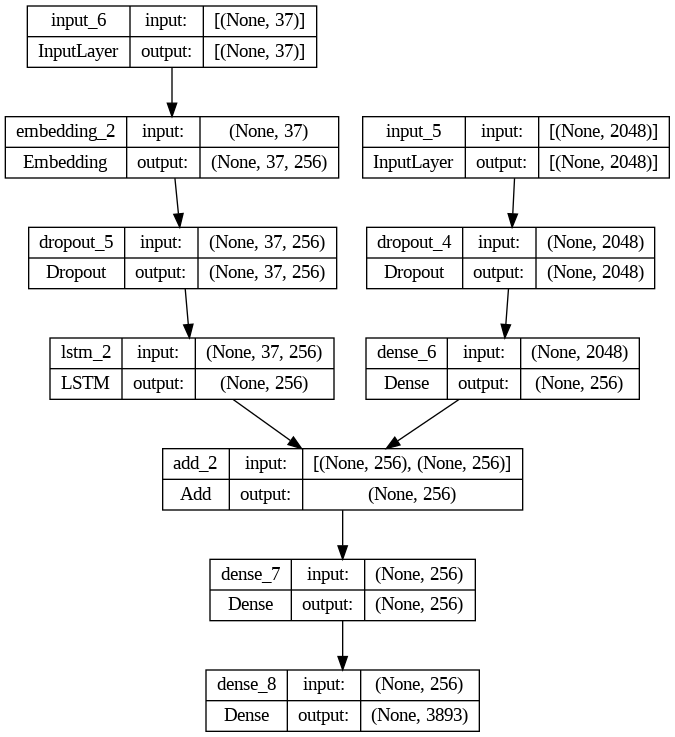

In [ ]:
# encoder model
# image feature layers
inputs1 = Input(shape=(2048,))
fe1 = Dropout(0.4)(inputs1)
fe2 = Dense(256, activation='relu')(fe1)

# sequence feature layers
inputs2 = Input(shape=(37,))
se1 = Embedding(len(vocabulary), 256, mask_zero =True)(inputs2)
se2 = Dropout(0.4)(se1)
se3 = LSTM(256)(se2)

# decoder model
decoder1 = add([fe2, se3])
decoder2 = Dense(256, activation='relu')(decoder1)
outputs = Dense(len(vocabulary), activation='softmax')(decoder2)

model = Model(inputs=[inputs1, inputs2], outputs=outputs)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# plot model
plot_model(model, show_shapes=True)

In [ ]:
from keras.models import load_model
model = load_model("my_model.h5")

In [ ]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download("my_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# training model
epochs = 20
batch_size = 64
steps = len(training_features) // batch_size

for i in range(epochs):
  print(f"epoch {i+1}:")
  generator = data_generator(training_features, batch_size)
  model.fit(generator, epochs=1, steps_per_epoch=steps, verbose=1)

epoch 1:
93/93 [==============================] - 13s 143ms/step - loss: 0.6528
epoch 2:
93/93 [==============================] - 13s 139ms/step - loss: 0.6380
epoch 3:
93/93 [==============================] - 13s 142ms/step - loss: 0.6258
epoch 4:
93/93 [==============================] - 13s 141ms/step - loss: 0.6124
epoch 5:
93/93 [==============================] - 13s 142ms/step - loss: 0.6039
epoch 6:
93/93 [==============================] - 13s 143ms/step - loss: 0.6052
epoch 7:
93/93 [==============================] - 13s 142ms/step - loss: 0.5923
epoch 8:
93/93 [==============================] - 14s 146ms/step - loss: 0.5881
epoch 9:
93/93 [==============================] - 14s 148ms/step - loss: 0.5813
epoch 10:
93/93 [==============================] - 14s 144ms/step - loss: 0.5710
epoch 11:
93/93 [==============================] - 14s 149ms/step - loss: 0.5626
epoch 12:
93/93 [==============================] - 20s 209ms/step - loss: 0.5551
epoch 13:
93/93 [====================

In [ ]:
print(vocabulary)

[['a' '1']
 ['.' '2']
 ['in' '3']
 ...
 ['startseq' '3891']
 ['endseq' '3892']
 ['unk' '3893']]


In [ ]:
# converting vocabulary back from ndarray to dictionary
# Separate the keys and values from the numpy array
keys_array = vocabulary[:, 0]
values_array = vocabulary[:, 1]

# Convert the keys and values from the numpy array to a vocabulary dictionary
vocabulary = {key: int(value) for key, value in zip(keys_array, values_array)}

# Now you have the vocabulary dictionary restored
print(vocabulary)

{'a': 1, '.': 2, 'in': 3, 'the': 4, 'and': 5, 'on': 6, 'is': 7, 'dog': 8, 'of': 9, 'man': 10, 'with': 11, 'black': 12, 'boy': 13, 'white': 14, 'girl': 15, 'brown': 16, 'are': 17, 'to': 18, 'two': 19, ',': 20, 'at': 21, 'water': 22, 'red': 23, 'an': 24, 'his': 25, 'woman': 26, 'wearing': 27, 'while': 28, 'group': 29, 'blue': 30, 'people': 31, 'shirt': 32, 'running': 33, 'playing': 34, 'through': 35, 'down': 36, 'standing': 37, 'ball': 38, 'jumping': 39, 'child': 40, 'snow': 41, 'another': 42, 'over': 43, 'grass': 44, 'dogs': 45, 'front': 46, 'green': 47, 'field': 48, 'holding': 49, 'sitting': 50, 'by': 51, 'little': 52, 'yellow': 53, 'walking': 54, 'her': 55, 'up': 56, 'beach': 57, 'from': 58, 'mouth': 59, 'children': 60, 'for': 61, 'person': 62, 'jumps': 63, 'air': 64, 'player': 65, 'large': 66, 'runs': 67, 'riding': 68, 'into': 69, 'its': 70, 'as': 71, 'pink': 72, 'near': 73, 'street': 74, 'stands': 75, 'behind': 76, 'bike': 77, 'dressed': 78, 'next': 79, 'rock': 80, 'off': 81, 'camer

In [ ]:
# inverse vocabulary dictionary for token to word conversion
inverse_vocabulary = {}
for key, value in vocabulary.items():
  inverse_vocabulary[value] = key

print(inverse_vocabulary)

{1: 'a', 2: '.', 3: 'in', 4: 'the', 5: 'and', 6: 'on', 7: 'is', 8: 'dog', 9: 'of', 10: 'man', 11: 'with', 12: 'black', 13: 'boy', 14: 'white', 15: 'girl', 16: 'brown', 17: 'are', 18: 'to', 19: 'two', 20: ',', 21: 'at', 22: 'water', 23: 'red', 24: 'an', 25: 'his', 26: 'woman', 27: 'wearing', 28: 'while', 29: 'group', 30: 'blue', 31: 'people', 32: 'shirt', 33: 'running', 34: 'playing', 35: 'through', 36: 'down', 37: 'standing', 38: 'ball', 39: 'jumping', 40: 'child', 41: 'snow', 42: 'another', 43: 'over', 44: 'grass', 45: 'dogs', 46: 'front', 47: 'green', 48: 'field', 49: 'holding', 50: 'sitting', 51: 'by', 52: 'little', 53: 'yellow', 54: 'walking', 55: 'her', 56: 'up', 57: 'beach', 58: 'from', 59: 'mouth', 60: 'children', 61: 'for', 62: 'person', 63: 'jumps', 64: 'air', 65: 'player', 66: 'large', 67: 'runs', 68: 'riding', 69: 'into', 70: 'its', 71: 'as', 72: 'pink', 73: 'near', 74: 'street', 75: 'stands', 76: 'behind', 77: 'bike', 78: 'dressed', 79: 'next', 80: 'rock', 81: 'off', 82: 'c

In [ ]:
def predict_caption(model, image_feature, max_length=37):
  sequence = ['3891'] # token of startseq

  for i in range(max_length):
    inter_sequence = pad_sequences([sequence], max_length)[0]
    yhat = model.predict([np.reshape(image_feature, (1, 2048)), np.reshape(inter_sequence, (1, 37))], verbose=0)
    yhat = np.argmax(yhat)
    sequence.append(yhat)
    if yhat == '3892':
      break

  caption = "startseq"
  for i in range(1, len(sequence)):
    caption += ' ' + inverse_vocabulary[sequence[i]]
    if inverse_vocabulary[sequence[i]] == "endseq":
      break

  # removing startseq and endseq
  caption = caption.split(' ')
  caption = caption[1: -1]
  caption = ' '.join(caption)

  return caption

In [ ]:
from keras.models import load_model

model_1 = load_model("model_1.h5") # trained on 20 epochs of training data
model_2 = load_model("model_2.h5") # trained on 20 epochs of training data, 20 epochs of first augmentation, 20 epochs of second augmentation
model_3 = load_model("model_3.h5") # trained on 20 epochs of training data, 20 epochs of first augmentation, 20 epochs of second augmentation, then another 20 epochs of training data

In [ ]:
for i in range(40,60):
  y_pred = predict_caption(model_3, validation_features[i])
  print(y_pred)

a boy in a white shirt is rock climbing .
a woman wearing a helmet on a dirt bike riding a leaf .
a girl in a purple shirt is running away from a tennis ball .
a black dog is running through the water .
a boy in a blue shirt looking down at a kid stands to the base .
a boy in a black and yellow coat is leaping a ramp .
a child swings on a trampoline .
a dog is jumping over the beach .
a dog runs behind a tree .
a group of people dancing together .
a black dog and a brown dog are playing with a tennis ball in a lake .
a boy with a blue shirt walks down the concrete wall .
a man in a blue shirt and blue shorts leaps in the air .
a man in a blue shirt climbs a rocky ledge at the view of the water .
a girl in a red shirt is looking at the camera .
a group of people do a ball on a surfboard .
a man in a blue coat and blue helmet is jumping in the air .
a child is high on a net .
a girl in a pink bikini is splashing in a trampoline .
a man in a white shirt and a black coat with a blue sign i

In [ ]:
validation_captions_for_BLEU_score = [] # should be list of list of words

for i in range(len(grouped_validation_captions)):
  validation_captions_for_BLEU_score.append([])
  for j in range(5):
    validation_captions_for_BLEU_score[-1].append(grouped_validation_captions[i][j].split(' '))

print(validation_captions_for_BLEU_score[0])

[['the', 'boy', 'laying', 'face', 'down', 'on', 'a', 'skateboard', 'is', 'being', 'pushed', 'along', 'the', 'ground', 'by', 'another', 'boy', '.'], ['Two', 'girls', 'play', 'on', 'a', 'skateboard', 'in', 'a', 'courtyard', '.'], ['Two', 'people', 'play', 'on', 'a', 'long', 'skateboard', '.'], ['Two', 'small', 'children', 'in', 'red', 'shirts', 'playing', 'on', 'a', 'skateboard', '.'], ['two', 'young', 'children', 'on', 'a', 'skateboard', 'going', 'across', 'a', 'sidewalk']]


In [ ]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_BLEU_for_model_on_validation_data(model, length_of_evaluated_validation_data):
  bleu_1,  bleu_2 = 0, 0

  for i in range(length_of_evaluated_validation_data):
    generated_caption = predict_caption(model, validation_features[i]).split(' ')
    bleu_1 += sentence_bleu(validation_captions_for_BLEU_score[i], generated_caption, weights=(1.0, 0, 0, 0), smoothing_function=SmoothingFunction().method1)
    bleu_2 += sentence_bleu(validation_captions_for_BLEU_score[i], generated_caption, weights=(0.5, 0.5, 0, 0), smoothing_function=SmoothingFunction().method1)

  bleu_1 /= length_of_evaluated_validation_data
  bleu_2 /= length_of_evaluated_validation_data

  return bleu_1, bleu_2

In [ ]:
# bleu score on model_1
bleu_1_for_model_1, bleu_2_for_model_1 = calculate_BLEU_for_model_on_validation_data(model_1, 100)
print(f"1-gram BLEU score: {bleu_1_for_model_1}")
print(f"2-gram BLEU score: {bleu_2_for_model_1}")

1-gram BLEU score: 0.5064891324677597
2-gram BLEU score: 0.282325347999401


In [ ]:
# bleu score on model_2
bleu_1_for_model_2, bleu_2_for_model_2 = calculate_BLEU_for_model_on_validation_data(model_2, 100)
print(f"1-gram BLEU score: {bleu_1_for_model_2}")
print(f"2-gram BLEU score: {bleu_2_for_model_2}")

1-gram BLEU score: 0.5108447346385211
2-gram BLEU score: 0.2819468980734824


In [ ]:
# bleu score on model_3
bleu_1_for_model_3, bleu_2_for_model_3 = calculate_BLEU_for_model_on_validation_data(model_3, 100)
print(f"1-gram BLEU score: {bleu_1_for_model_3}")
print(f"2-gram BLEU score: {bleu_2_for_model_3}")

1-gram BLEU score: 0.49386249590051123
2-gram BLEU score: 0.25522565177195033
